In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '73e3735a-8e27-4c9b-8270-fccd3f2284d4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-03-05T18:53:30.287Z', 'error_code': 0, 'error_message': None, 'elapsed': 83, 'credit_count': 25, 'notice': None, 'total_count': 8883}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10850, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [18]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df=pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id             name     symbol             slug  num_market_pairs  \
0         1          Bitcoin        BTC          bitcoin             10850   
1      1027         Ethereum        ETH         ethereum              8500   
2       825      Tether USDt       USDT           tether             76999   
3      1839              BNB        BNB              bnb              2082   
4      5426           Solana        SOL           solana               633   
...     ...              ...        ...              ...               ...   
4995   9848  Moonlight Token  MOONLIGHT  moonlight-token                13   
4996  27200     AppleSwap AI         AP     appleswap-ai                 1   
4997  15937         PlayNity        PLY         playnity                 6   
4998  23002        MTG Token        MTG        mtg-token                 5   
4999  23761           uShark     USHARK           ushark                 3   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2021-05-16T00:00:00.000Z   
4996  2023-06-26T05:55:33.000Z   
4997  2021-12-13T01:44:57.000Z   
4998  2023-01-20T19:14:04.000Z   
4999  2023-03-05T13:06:17.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...           NaN   
...                                                 ...           ...   
4995                                        [bnb-chain]  1.000000e+15   
4996                                                 []           NaN   
4997            [gaming, play-to-earn, terra-ecosystem]  1.500000e+08   
4998                                                 []  1.000000e+09   
4999                                                 []  5.700000e+09   

      circulating_supply         total_supply  ...  \
0           1.964557e+07             19645568  ...   
1           1.201271e+08     120127131.789952  ...   
2           1.000447e+11  103800078701.878143  ...   
3           1.495413e+08      149541280.83143  ...   
4           4.424379e+08     571210527.537973  ...   
...                  ...                  ...  ...   
4995        0.000000e+00     1000000000000000  ...   
4996        0.000000e+00             10000000  ...   
4997        0.000000e+00            150000000  ...   
4998        0.000000e+00           1000000000  ...   
4999        0.000000e+00           5700000000  ...   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                            51.5696                        1.339980e+12   
1                            17.8013                        4.319659e+11   
2                             4.1244                        1.038408e+11   
3                             2.4910                        6.055157e+10   
4                             2.3965                        7.520771e+10   
...                              ...                                 ...   
4995                          0.0000                        7.113788e+06   
4996                          0.0000                        0.000000e+00   
4997                          0.0000                        5.008107e+05   
4998                          0.0000                        4.157089e+05   
4999                          0.0000                        1.540013e+06   

      quote.USD.tvl    quote.USD.last_updated  platform.id  \
0               NaN  2024-03-05T18:52:00.000Z          NaN   
1               NaN  2024-03-05T18:52:00.000Z          NaN   
2               NaN  2024-03-05T18:51:

In [25]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '73e3735a-8e27-4c9b-8270-fccd3f2284d4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])
    
    #if not os.path.isfile(r'C:\Users\sahil\OneDrive\Email attachments\Documents\api.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)

In [26]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api runner completed')
    sleep(60)#Sleep for one minute
exit()    

Api runner completed
Api runner completed
Api runner completed
Api runner completed
Api runner completed


KeyboardInterrupt: 

In [27]:
df

id         name symbol          slug  num_market_pairs  \
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethereum              8500   
2    825  Tether USDt   USDT        tether             77006   
3   1839          BNB    BNB           bnb              2082   
4   5426       Solana    SOL        solana               634   
5     52          XRP    XRP           xrp              1239   
6   3408         USDC   USDC      usd-coin             17038   
7   2010      Cardano    ADA       cardano              1088   
8     74     Dogecoin   DOGE      dogecoin               905   
9   5994    Shiba Inu   SHIB     shiba-inu               752   
10  5805    Avalanche   AVAX     avalanche               677   
11  6636     Polkadot    DOT  polkadot-new               699   
12  1958         TRON    TRX          tron               939   
13  1975    Chainlink   LINK     chainlink              1669   
14  3890      Polygon  MATIC       polygon              1299   
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethereum              8500   
2    825  Tether USDt   USDT        tether             77006   
3   1839          BNB    BNB           bnb              2082   
4   5426       Solana    SOL        solana               634   
5     52          XRP    XRP           xrp              1239   
6   3408         USDC   USDC      usd-coin             17038   
7   2010      Cardano    ADA       cardano              1088   
8     74     Dogecoin   DOGE      dogecoin               905   
9   5994    Shiba Inu   SHIB     shiba-inu               752   
10  5805    Avalanche   AVAX     avalanche               677   
11  1958         TRON    TRX          tron               939   
12  6636     Polkadot    DOT  polkadot-new               699   
13  1975    Chainlink   LINK     chainlink              1669   
14  3890      Polygon  MATIC       polygon              1299   
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethereum              8500   
2    825  Tether USDt   USDT        tether             77006   
3   1839          BNB    BNB           bnb              2082   
4   5426       Solana    SOL        solana               634   
5     52          XRP    XRP           xrp              1239   
6   3408         USDC   USDC      usd-coin             17038   
7   2010      Cardano    ADA       cardano              1088   
8     74     Dogecoin   DOGE      dogecoin               905   
9   5994    Shiba Inu   SHIB     shiba-inu               752   
10  5805    Avalanche   AVAX     avalanche               677   
11  1958         TRON    TRX          tron               939   
12  6636     Polkadot    DOT  polkadot-new               699   
13  1975    Chainlink   LINK     chainlink              1669   
14  3890      Polygon  MATIC       polygon              1299   
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethereum              8500   
2    825  Tether USDt   USDT        tether             77006   
3   1839          BNB    BNB           bnb              2082   
4   5426       Solana    SOL        solana               634   
5     52          XRP    XRP           xrp              1239   
6   3408         USDC   USDC      usd-coin             17038   
7   2010      Cardano    ADA       cardano              1088   
8     74     Dogecoin   DOGE      dogecoin               905   
9   5994    Shiba Inu   SHIB     shiba-inu               752   
10  5805    Avalanche   AVAX     avalanche               677   
11  1958         TRON    TRX          tron               939   
12  6636     Polkadot    DOT  polkadot-new               699   
13  1975    Chainlink   LINK     chainlink              1669   
14  3890      Polygon  MATIC       polygon              1299   
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethe

In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df

id         name symbol          slug  num_market_pairs  \
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethereum              8500   
2    825  Tether USDt   USDT        tether             77006   
3   1839          BNB    BNB           bnb              2082   
4   5426       Solana    SOL        solana               634   
5     52          XRP    XRP           xrp              1239   
6   3408         USDC   USDC      usd-coin             17038   
7   2010      Cardano    ADA       cardano              1088   
8     74     Dogecoin   DOGE      dogecoin               905   
9   5994    Shiba Inu   SHIB     shiba-inu               752   
10  5805    Avalanche   AVAX     avalanche               677   
11  6636     Polkadot    DOT  polkadot-new               699   
12  1958         TRON    TRX          tron               939   
13  1975    Chainlink   LINK     chainlink              1669   
14  3890      Polygon  MATIC       polygon              1299   
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethereum              8500   
2    825  Tether USDt   USDT        tether             77006   
3   1839          BNB    BNB           bnb              2082   
4   5426       Solana    SOL        solana               634   
5     52          XRP    XRP           xrp              1239   
6   3408         USDC   USDC      usd-coin             17038   
7   2010      Cardano    ADA       cardano              1088   
8     74     Dogecoin   DOGE      dogecoin               905   
9   5994    Shiba Inu   SHIB     shiba-inu               752   
10  5805    Avalanche   AVAX     avalanche               677   
11  1958         TRON    TRX          tron               939   
12  6636     Polkadot    DOT  polkadot-new               699   
13  1975    Chainlink   LINK     chainlink              1669   
14  3890      Polygon  MATIC       polygon              1299   
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethereum              8500   
2    825  Tether USDt   USDT        tether             77006   
3   1839          BNB    BNB           bnb              2082   
4   5426       Solana    SOL        solana               634   
5     52          XRP    XRP           xrp              1239   
6   3408         USDC   USDC      usd-coin             17038   
7   2010      Cardano    ADA       cardano              1088   
8     74     Dogecoin   DOGE      dogecoin               905   
9   5994    Shiba Inu   SHIB     shiba-inu               752   
10  5805    Avalanche   AVAX     avalanche               677   
11  1958         TRON    TRX          tron               939   
12  6636     Polkadot    DOT  polkadot-new               699   
13  1975    Chainlink   LINK     chainlink              1669   
14  3890      Polygon  MATIC       polygon              1299   
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethereum              8500   
2    825  Tether USDt   USDT        tether             77006   
3   1839          BNB    BNB           bnb              2082   
4   5426       Solana    SOL        solana               634   
5     52          XRP    XRP           xrp              1239   
6   3408         USDC   USDC      usd-coin             17038   
7   2010      Cardano    ADA       cardano              1088   
8     74     Dogecoin   DOGE      dogecoin               905   
9   5994    Shiba Inu   SHIB     shiba-inu               752   
10  5805    Avalanche   AVAX     avalanche               677   
11  1958         TRON    TRX          tron               939   
12  6636     Polkadot    DOT  polkadot-new               699   
13  1975    Chainlink   LINK     chainlink              1669   
14  3890      Polygon  MATIC       polygon              1299   
0      1      Bitcoin    BTC       bitcoin             10850   
1   1027     Ethereum    ETH      ethe

In [30]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                         -3.54233                      -8.16638   
Ethereum                        -5.66194                      -4.99573   
Tether USDt                      0.03252                      -0.02460   
BNB                             -6.81318                      -9.65120   
Solana                          -9.57886                      -8.32191   
XRP                             -7.81807                     -13.26642   
USDC                            -0.01690                      -0.03119   
Cardano                        -12.43268                     -18.84954   
Dogecoin                       -12.06027                     -21.51517   
Shiba Inu                      -12.71210                     -18.15688   
Avalanche                      -10.51596                     -12.92418   
Polkadot                       -10.65034                     -11.33863   
TRON                            -1.61587                      -2.98201   
Chainlink                      -10.30654                     -12.45327   
Polygon                         -8.65288                     -13.67391   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                          8.00261                      45.12038   
Ethereum                         5.04025                      49.85752   
Tether USDt                      0.03439                       0.10188   
BNB                             -4.82552                      23.25272   
Solana                           9.90105                      23.49808   
XRP                             -4.18664                      12.26966   
USDC                            -0.02550                      -0.04719   
Cardano                          0.78198                      26.40664   
Dogecoin                        41.28612                      76.57207   
Shiba Inu                      147.13367                     211.84770   
Avalanche                       -5.02349                       4.67545   
Polkadot                         7.35979                      30.89824   
TRON                            -4.27396                      15.11007   
Chainlink                       -6.72397                      -2.52023   
Polygon                         -4.52890                      26.59984   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                          41.71609                      40.52181  
Ethereum                         52.69382                      50.78956  
Tether USDt                      -0.00371                       0.06364  
BNB                              19.64236                      62.98067  
Solana                           21.25132                      85.14076  
XRP                              -0.00654                      -9.84273  
USDC                             -0.04487                      -0.04163  
Cardano                          19.30889                      41.31495  
Dogecoin                         70.62928                      40.76826  
Shiba Inu                       189.03894                     178.86265  
Avalanche                         3.78178                      35.48032  
Polkadot                         20.50171                      45.04295  
TRON                             30.83614                      29.08622  
Chainlink                        28.49175                      13.12405  
Polygon                          17.91963                      17.53901

In [31]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -3.54233
             quote.USD.percent_change_24h    -8.16638
             quote.USD.percent_change_7d      8.00261
             quote.USD.percent_change_30d    45.12038
             quote.USD.percent_change_60d    41.71609
             quote.USD.percent_change_90d    40.52181
Ethereum     quote.USD.percent_change_1h     -5.66194
             quote.USD.percent_change_24h    -4.99573
             quote.USD.percent_change_7d      5.04025
             quote.USD.percent_change_30d    49.85752
             quote.USD.percent_change_60d    52.69382
             quote.USD.percent_change_90d    50.78956
Tether USDt  quote.USD.percent_change_1h      0.03252
             quote.USD.percent_change_24h    -0.02460
             quote.USD.percent_change_7d      0.03439
             quote.USD.percent_change_30d     0.10188
             quote.USD.percent_change_60d    -0.00371
             quote.USD.percent_change_90

In [32]:
type(df4)

pandas.core.series.Series

In [33]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -3.54233
            quote.USD.percent_change_24h  -8.16638
            quote.USD.percent_change_7d    8.00261
            quote.USD.percent_change_30d  45.12038
            quote.USD.percent_change_60d  41.71609
            quote.USD.percent_change_90d  40.52181
Ethereum    quote.USD.percent_change_1h   -5.66194
            quote.USD.percent_change_24h  -4.99573
            quote.USD.percent_change_7d    5.04025
            quote.USD.percent_change_30d  49.85752
            quote.USD.percent_change_60d  52.69382
            quote.USD.percent_change_90d  50.78956
Tether USDt quote.USD.percent_change_1h    0.03252
            quote.USD.percent_change_24h  -0.02460
            quote.USD.percent_change_7d    0.03439
            quote.USD.percent_change_30d   0.10188
            quote.USD.percent_change_60d  -0.00371
            quote.USD.percent_change_90d   0.06364
BNB         quote.USD.percent_change_1h   -6.81318
            quote.USD.percent_change_24h  -9.65120
            quote.USD.percent_change_7d   -4.82552
            quote.USD.percent_change_30d  23.25272
            quote.USD.percent_change_60d  19.64236
            quote.USD.percent_change_90d  62.98067
Solana      quote.USD.percent_change_1h   -9.57886
            quote.USD.percent_change_24h  -8.32191
            quote.USD.percent_change_7d    9.90105
            quote.USD.percent_change_30d  23.49808
            quote.USD.percent_change_60d  21.25132
            quote.USD.percent_change_90d  85.14076
XRP         quote.USD.percent_change_1h   -7.81807
            quote.USD.percent_change_24h -13.26642
            quote.USD.percent_change_7d   -4.18664
            quote.USD.percent_change_30d  12.26966
            quote.USD.percent_change_60d  -0.00654
            quote.USD.percent_change_90d  -9.84273
USDC        quote.USD.percent_change_1h   -0.01690
            quote.USD.percent_change_24h  -0.03119
            quote.USD.percent_change_7d   -0.02550
            quote.USD.percent_change_30d  -0.04719
            quote.USD.percent_change_60d  -0.04487
            quote.USD.percent_change_90d  -0.04163
Cardano     quote.USD.percent_change_1h  -12.43268
            quote.USD.percent_change_24h -18.84954
            quote.USD.percent_change_7d    0.78198
            quote.USD.percent_change_30d  26.40664
            quote.USD.percent_change_60d  19.30889
            quote.USD.percent_change_90d  41.31495
Dogecoin    quote.USD.percent_change_1h  -12.06027
            quote.USD.percent_change_24h -21.51517
            quote.USD.percent_change_7d   41.28612
            quote.USD.percent_change_30d  76.57207
            quote.USD.percent_change_60d  70.62928
            quote.USD.percent_change_90d  40.76826
Shiba Inu   quote.USD.percent_change_1h  -12.71210
            quote.USD.percent_change_24h -18.15688
            quote.USD.percent_change_7d  147.13367
            quote.USD.percent_change_30d 211.84770
            quote.USD.percent_change_60d 189.03894
            quote.USD.percent_change_90d 178.86265
Avalanche   quote.USD.percent_change_1h  -10.51596
            quote.USD.percent_change_24h -12.92418
            quote.USD.percent_change_7d   -5.02349
            quote.USD.percent_change_30d   4.67545
            quote.USD.percent_change_60d   3.78178
            quote.USD.percent_change_90d  35.48032
Polkadot    quote.USD.percent_change_1h  -10.65034
            quote.USD.percent_change_24h -11.33863
            quote.USD.percent_change_7d    7.35979
            quote.USD.percent_change_30d  30.89824
            quote.USD.percent_change_60d  20.50171
            quote.USD.percent_change_90d  45.04295
TRON        quote.USD.percent_change_1h   -1.61587
            quote.USD.percent_change_24h  -2.98201
            quote.USD.percent_change_7d   -4.27396
            quote.USD.percent_change_30d  15.11007
            quote.USD.percent_change_60d  30.83614
            quo

In [34]:
df5.count()

values    90
dtype: int64

In [36]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

name                       level_1    values
0       Bitcoin   quote.USD.percent_change_1h  -3.54233
1       Bitcoin  quote.USD.percent_change_24h  -8.16638
2       Bitcoin   quote.USD.percent_change_7d   8.00261
3       Bitcoin  quote.USD.percent_change_30d  45.12038
4       Bitcoin  quote.USD.percent_change_60d  41.71609
5       Bitcoin  quote.USD.percent_change_90d  40.52181
6      Ethereum   quote.USD.percent_change_1h  -5.66194
7      Ethereum  quote.USD.percent_change_24h  -4.99573
8      Ethereum   quote.USD.percent_change_7d   5.04025
9      Ethereum  quote.USD.percent_change_30d  49.85752
10     Ethereum  quote.USD.percent_change_60d  52.69382
11     Ethereum  quote.USD.percent_change_90d  50.78956
12  Tether USDt   quote.USD.percent_change_1h   0.03252
13  Tether USDt  quote.USD.percent_change_24h  -0.02460
14  Tether USDt   quote.USD.percent_change_7d   0.03439
15  Tether USDt  quote.USD.percent_change_30d   0.10188
16  Tether USDt  quote.USD.percent_change_60d  -0.00371
17  Tether USDt  quote.USD.percent_change_90d   0.06364
18          BNB   quote.USD.percent_change_1h  -6.81318
19          BNB  quote.USD.percent_change_24h  -9.65120
20          BNB   quote.USD.percent_change_7d  -4.82552
21          BNB  quote.USD.percent_change_30d  23.25272
22          BNB  quote.USD.percent_change_60d  19.64236
23          BNB  quote.USD.percent_change_90d  62.98067
24       Solana   quote.USD.percent_change_1h  -9.57886
25       Solana  quote.USD.percent_change_24h  -8.32191
26       Solana   quote.USD.percent_change_7d   9.90105
27       Solana  quote.USD.percent_change_30d  23.49808
28       Solana  quote.USD.percent_change_60d  21.25132
29       Solana  quote.USD.percent_change_90d  85.14076
30          XRP   quote.USD.percent_change_1h  -7.81807
31          XRP  quote.USD.percent_change_24h -13.26642
32          XRP   quote.USD.percent_change_7d  -4.18664
33          XRP  quote.USD.percent_change_30d  12.26966
34          XRP  quote.USD.percent_change_60d  -0.00654
35          XRP  quote.USD.percent_change_90d  -9.84273
36         USDC   quote.USD.percent_change_1h  -0.01690
37         USDC  quote.USD.percent_change_24h  -0.03119
38         USDC   quote.USD.percent_change_7d  -0.02550
39         USDC  quote.USD.percent_change_30d  -0.04719
40         USDC  quote.USD.percent_change_60d  -0.04487
41         USDC  quote.USD.percent_change_90d  -0.04163
42      Cardano   quote.USD.percent_change_1h -12.43268
43      Cardano  quote.USD.percent_change_24h -18.84954
44      Cardano   quote.USD.percent_change_7d   0.78198
45      Cardano  quote.USD.percent_change_30d  26.40664
46      Cardano  quote.USD.percent_change_60d  19.30889
47      Cardano  quote.USD.percent_change_90d  41.31495
48     Dogecoin   quote.USD.percent_change_1h -12.06027
49     Dogecoin  quote.USD.percent_change_24h -21.51517
50     Dogecoin   quote.USD.percent_change_7d  41.28612
51     Dogecoin  quote.USD.percent_change_30d  76.57207
52     Dogecoin  quote.USD.percent_change_60d  70.62928
53     Dogecoin  quote.USD.percent_change_90d  40.76826
54    Shiba Inu   quote.USD.percent_change_1h -12.71210
55    Shiba Inu  quote.USD.percent_change_24h -18.15688
56    Shiba Inu   quote.USD.percent_change_7d 147.13367
57    Shiba Inu  quote.USD.percent_change_30d 211.84770
58    Shiba Inu  quote.USD.percent_change_60d 189.03894
59    Shiba Inu  quote.USD.percent_change_90d 178.86265
60    Avalanche   quote.USD.percent_change_1h -10.51596
61    Avalanche  quote.USD.percent_change_24h -12.92418
62    Avalanche   quote.USD.percent_change_7d  -5.02349
63    Avalanche  quote.USD.percent_change_30d   4.67545
64    Avalanche  quote.USD.percent_change_60d   3.78178
65    Avalanche  quote.USD.percent_change_90d  35.48032
66     Polkadot   quote.USD.percent_change_1h -10.65034
67     Polkadot  quote.USD.percent_change_24h -11.33863
68     Polkadot   quote.USD.percent_change_7d   7.35979
69     Polkadot  quote.USD.percent_change_30d  30.89824
70     Polkadot  quote.USD.percent_

In [37]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0       Bitcoin   quote.USD.percent_change_1h  -3.54233
1       Bitcoin  quote.USD.percent_change_24h  -8.16638
2       Bitcoin   quote.USD.percent_change_7d   8.00261
3       Bitcoin  quote.USD.percent_change_30d  45.12038
4       Bitcoin  quote.USD.percent_change_60d  41.71609
5       Bitcoin  quote.USD.percent_change_90d  40.52181
6      Ethereum   quote.USD.percent_change_1h  -5.66194
7      Ethereum  quote.USD.percent_change_24h  -4.99573
8      Ethereum   quote.USD.percent_change_7d   5.04025
9      Ethereum  quote.USD.percent_change_30d  49.85752
10     Ethereum  quote.USD.percent_change_60d  52.69382
11     Ethereum  quote.USD.percent_change_90d  50.78956
12  Tether USDt   quote.USD.percent_change_1h   0.03252
13  Tether USDt  quote.USD.percent_change_24h  -0.02460
14  Tether USDt   quote.USD.percent_change_7d   0.03439
15  Tether USDt  quote.USD.percent_change_30d   0.10188
16  Tether USDt  quote.USD.percent_change_60d  -0.00371
17  Tether USDt  quote.USD.percent_change_90d   0.06364
18          BNB   quote.USD.percent_change_1h  -6.81318
19          BNB  quote.USD.percent_change_24h  -9.65120
20          BNB   quote.USD.percent_change_7d  -4.82552
21          BNB  quote.USD.percent_change_30d  23.25272
22          BNB  quote.USD.percent_change_60d  19.64236
23          BNB  quote.USD.percent_change_90d  62.98067
24       Solana   quote.USD.percent_change_1h  -9.57886
25       Solana  quote.USD.percent_change_24h  -8.32191
26       Solana   quote.USD.percent_change_7d   9.90105
27       Solana  quote.USD.percent_change_30d  23.49808
28       Solana  quote.USD.percent_change_60d  21.25132
29       Solana  quote.USD.percent_change_90d  85.14076
30          XRP   quote.USD.percent_change_1h  -7.81807
31          XRP  quote.USD.percent_change_24h -13.26642
32          XRP   quote.USD.percent_change_7d  -4.18664
33          XRP  quote.USD.percent_change_30d  12.26966
34          XRP  quote.USD.percent_change_60d  -0.00654
35          XRP  quote.USD.percent_change_90d  -9.84273
36         USDC   quote.USD.percent_change_1h  -0.01690
37         USDC  quote.USD.percent_change_24h  -0.03119
38         USDC   quote.USD.percent_change_7d  -0.02550
39         USDC  quote.USD.percent_change_30d  -0.04719
40         USDC  quote.USD.percent_change_60d  -0.04487
41         USDC  quote.USD.percent_change_90d  -0.04163
42      Cardano   quote.USD.percent_change_1h -12.43268
43      Cardano  quote.USD.percent_change_24h -18.84954
44      Cardano   quote.USD.percent_change_7d   0.78198
45      Cardano  quote.USD.percent_change_30d  26.40664
46      Cardano  quote.USD.percent_change_60d  19.30889
47      Cardano  quote.USD.percent_change_90d  41.31495
48     Dogecoin   quote.USD.percent_change_1h -12.06027
49     Dogecoin  quote.USD.percent_change_24h -21.51517
50     Dogecoin   quote.USD.percent_change_7d  41.28612
51     Dogecoin  quote.USD.percent_change_30d  76.57207
52     Dogecoin  quote.USD.percent_change_60d  70.62928
53     Dogecoin  quote.USD.percent_change_90d  40.76826
54    Shiba Inu   quote.USD.percent_change_1h -12.71210
55    Shiba Inu  quote.USD.percent_change_24h -18.15688
56    Shiba Inu   quote.USD.percent_change_7d 147.13367
57    Shiba Inu  quote.USD.percent_change_30d 211.84770
58    Shiba Inu  quote.USD.percent_change_60d 189.03894
59    Shiba Inu  quote.USD.percent_change_90d 178.86265
60    Avalanche   quote.USD.percent_change_1h -10.51596
61    Avalanche  quote.USD.percent_change_24h -12.92418
62    Avalanche   quote.USD.percent_change_7d  -5.02349
63    Avalanche  quote.USD.percent_change_30d   4.67545
64    Avalanche  quote.USD.percent_change_60d   3.78178
65    Avalanche  quote.USD.percent_change_90d  35.48032
66     Polkadot   quote.USD.percent_change_1h -10.65034
67     Polkadot  quote.USD.percent_change_24h -11.33863
68     Polkadot   quote.USD.percent_change_7d   7.35979
69     Polkadot  quote.USD.percent_change_30d  30.89824
70     Polkadot  quote.USD.percent_

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],  ['1h'])
df7
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

name percent_change    values
0       Bitcoin             1h  -3.54233
1       Bitcoin            24h  -8.16638
2       Bitcoin             7d   8.00261
3       Bitcoin            30d  45.12038
4       Bitcoin            60d  41.71609
5       Bitcoin            90d  40.52181
6      Ethereum             1h  -5.66194
7      Ethereum            24h  -4.99573
8      Ethereum             7d   5.04025
9      Ethereum            30d  49.85752
10     Ethereum            60d  52.69382
11     Ethereum            90d  50.78956
12  Tether USDt             1h   0.03252
13  Tether USDt            24h  -0.02460
14  Tether USDt             7d   0.03439
15  Tether USDt            30d   0.10188
16  Tether USDt            60d  -0.00371
17  Tether USDt            90d   0.06364
18          BNB             1h  -6.81318
19          BNB            24h  -9.65120
20          BNB             7d  -4.82552
21          BNB            30d  23.25272
22          BNB            60d  19.64236
23          BNB            90d  62.98067
24       Solana             1h  -9.57886
25       Solana            24h  -8.32191
26       Solana             7d   9.90105
27       Solana            30d  23.49808
28       Solana            60d  21.25132
29       Solana            90d  85.14076
30          XRP             1h  -7.81807
31          XRP            24h -13.26642
32          XRP             7d  -4.18664
33          XRP            30d  12.26966
34          XRP            60d  -0.00654
35          XRP            90d  -9.84273
36         USDC             1h  -0.01690
37         USDC            24h  -0.03119
38         USDC             7d  -0.02550
39         USDC            30d  -0.04719
40         USDC            60d  -0.04487
41         USDC            90d  -0.04163
42      Cardano             1h -12.43268
43      Cardano            24h -18.84954
44      Cardano             7d   0.78198
45      Cardano            30d  26.40664
46      Cardano            60d  19.30889
47      Cardano            90d  41.31495
48     Dogecoin             1h -12.06027
49     Dogecoin            24h -21.51517
50     Dogecoin             7d  41.28612
51     Dogecoin            30d  76.57207
52     Dogecoin            60d  70.62928
53     Dogecoin            90d  40.76826
54    Shiba Inu             1h -12.71210
55    Shiba Inu            24h -18.15688
56    Shiba Inu             7d 147.13367
57    Shiba Inu            30d 211.84770
58    Shiba Inu            60d 189.03894
59    Shiba Inu            90d 178.86265
60    Avalanche             1h -10.51596
61    Avalanche            24h -12.92418
62    Avalanche             7d  -5.02349
63    Avalanche            30d   4.67545
64    Avalanche            60d   3.78178
65    Avalanche            90d  35.48032
66     Polkadot             1h -10.65034
67     Polkadot            24h -11.33863
68     Polkadot             7d   7.35979
69     Polkadot            30d  30.89824
70     Polkadot            60d  20.50171
71     Polkadot            90d  45.04295
72         TRON             1h  -1.61587
73         TRON            24h  -2.98201
74         TRON             7d  -4.27396
75         TRON            30d  15.11007
76         TRON            60d  30.83614
77         TRON            90d  29.08622
78    Chainlink             1h -10.30654
79    Chainlink            24h -12.45327
80    Chainlink             7d  -6.72397
81    Chainlink            30d  -2.52023
82    Chainlink            60d  28.49175
83    Chainlink            90d  13.12405
84      Polygon             1h  -8.65288
85      Polygon            24h -13.67391
86      Polygon             7d  -4.52890
87      Polygon            30d  26.59984
88      Polygon            60d  17.91963
89      Polygon            90d  17.53901

C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


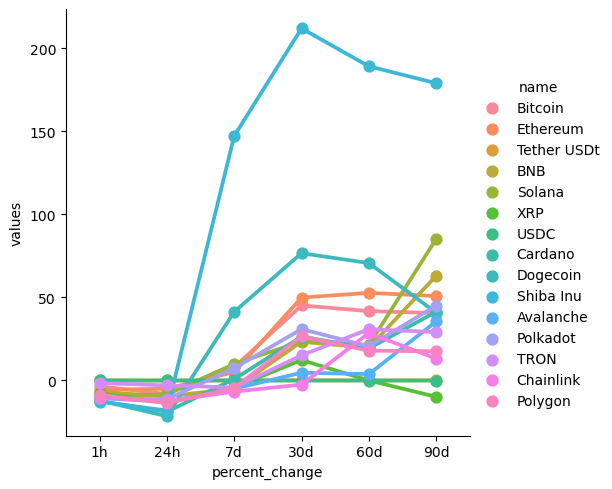

In [42]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [44]:
df9 = df[['name','quote.USD.price','Timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

name  quote.USD.price                  Timestamp
0  Bitcoin      62219.55123 2024-03-05 14:51:43.730386
0  Bitcoin      61211.64369 2024-03-05 15:00:24.358095
0  Bitcoin      61442.93654 2024-03-05 15:01:24.971439
0  Bitcoin      62018.65953 2024-03-05 15:02:25.487674
0  Bitcoin      62018.65953 2024-03-05 15:03:26.035582
0  Bitcoin      62234.19522 2024-03-05 15:04:26.560848

<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

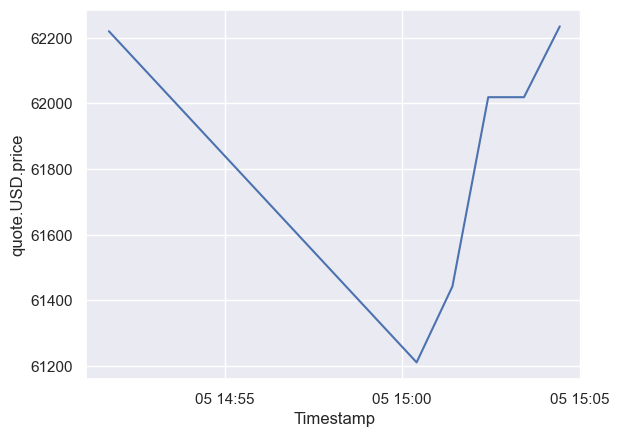

In [46]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df9)